[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/CMU-CISR/TernaryPlot/blob/master/TernaryPlot.ipynb)

# Plot inclusion compositions on ternary axes using symbol sizes proportional to number or area fraction

This notebook should be in a folder `/TernaryPlot`

Add your data (as csv files) to the following folder: `TernaryPlot/data/`

The three elements you wish to plot should be normalized to 100%.

Your data should also include a column labeled exactly "Area"


Python code originally written by Prof. Chris Pistorius

## Set up for file access

These cells only need to be run once per session.

The first cell mounts Google Drive and imports the relevant packages.

The second asks for the path to the TernaryPlot folder.  This can be found by using the folder explorer in the left panel of Colab.

TernaryPlotFunctions.py is the main functions file

Other packages used are: numpy, matplotlib.pyplot, and pandas

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



Mounted at /content/drive


NameError: name 'path' is not defined

In [2]:
path = input('What is the path to the TernaryPlot folder? ')
print()

# This line adds the TernaryPlot location to the Colab path and then imports the functions
sys.path.append(path)
import TernaryPlotFunctions as tpf

What is the path to the TernaryPlot folder? /content/drive/MyDrive/BAW Colab Notebooks/TernaryPlot



In [ ]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# This line adds the TernaryPlot location to the Colab path and then imports the functions
sys.path.append(path)
import TernaryPlotFunctions as tpf

## User Inputs

In [3]:
# Data file name
filename = 'afa_processed_results.csv'

# Sample ID
sample_id = 'Tundish sample'

# Set diagram axes
# IMPORTANT: The data columns you wish to plot must have the names you assign to A, B, C
#            and the column names must be unique
A, B, C = 'Mg', 'Al', 'Ca'

# Total scan area (mm^2)
area = 12.0

# 50% liquid line option
  # boundary = 1: no border
  # boundary = 2: Mg-Al-Ca
  # boundary = 3: Ca-Al-S
  # boundary = 4: Ca-Al-S w/ 5%MgO
boundary = 2

## Load input data

This cell does not typically need modified.

In [4]:
results = pd.read_csv(path + '/data/' + filename) # read the file as a pandas zdataframe, and save it into results

# setup of the parameters related to the data to be plotted
divisions = 32  # number of divisions along each of the composition axes

df = results # load the results into df

a_data = df[A].to_numpy() # name of the column (in the file that was read) where the data related to the A axis is located
b_data = df[B].to_numpy() # name of the column (in the file that was read) where the data related to the B axis is located
c_data = df[C].to_numpy() # name of the column (in the file that was read) where the data related to the C axis is located
area_data = df['Area'].to_numpy() # name of the column (in the file that was read) where the data related to the Area of each observation is located

## Generate the plot

The following cell **should not be changed**, unless you wish to tweak some positional details on the plot.

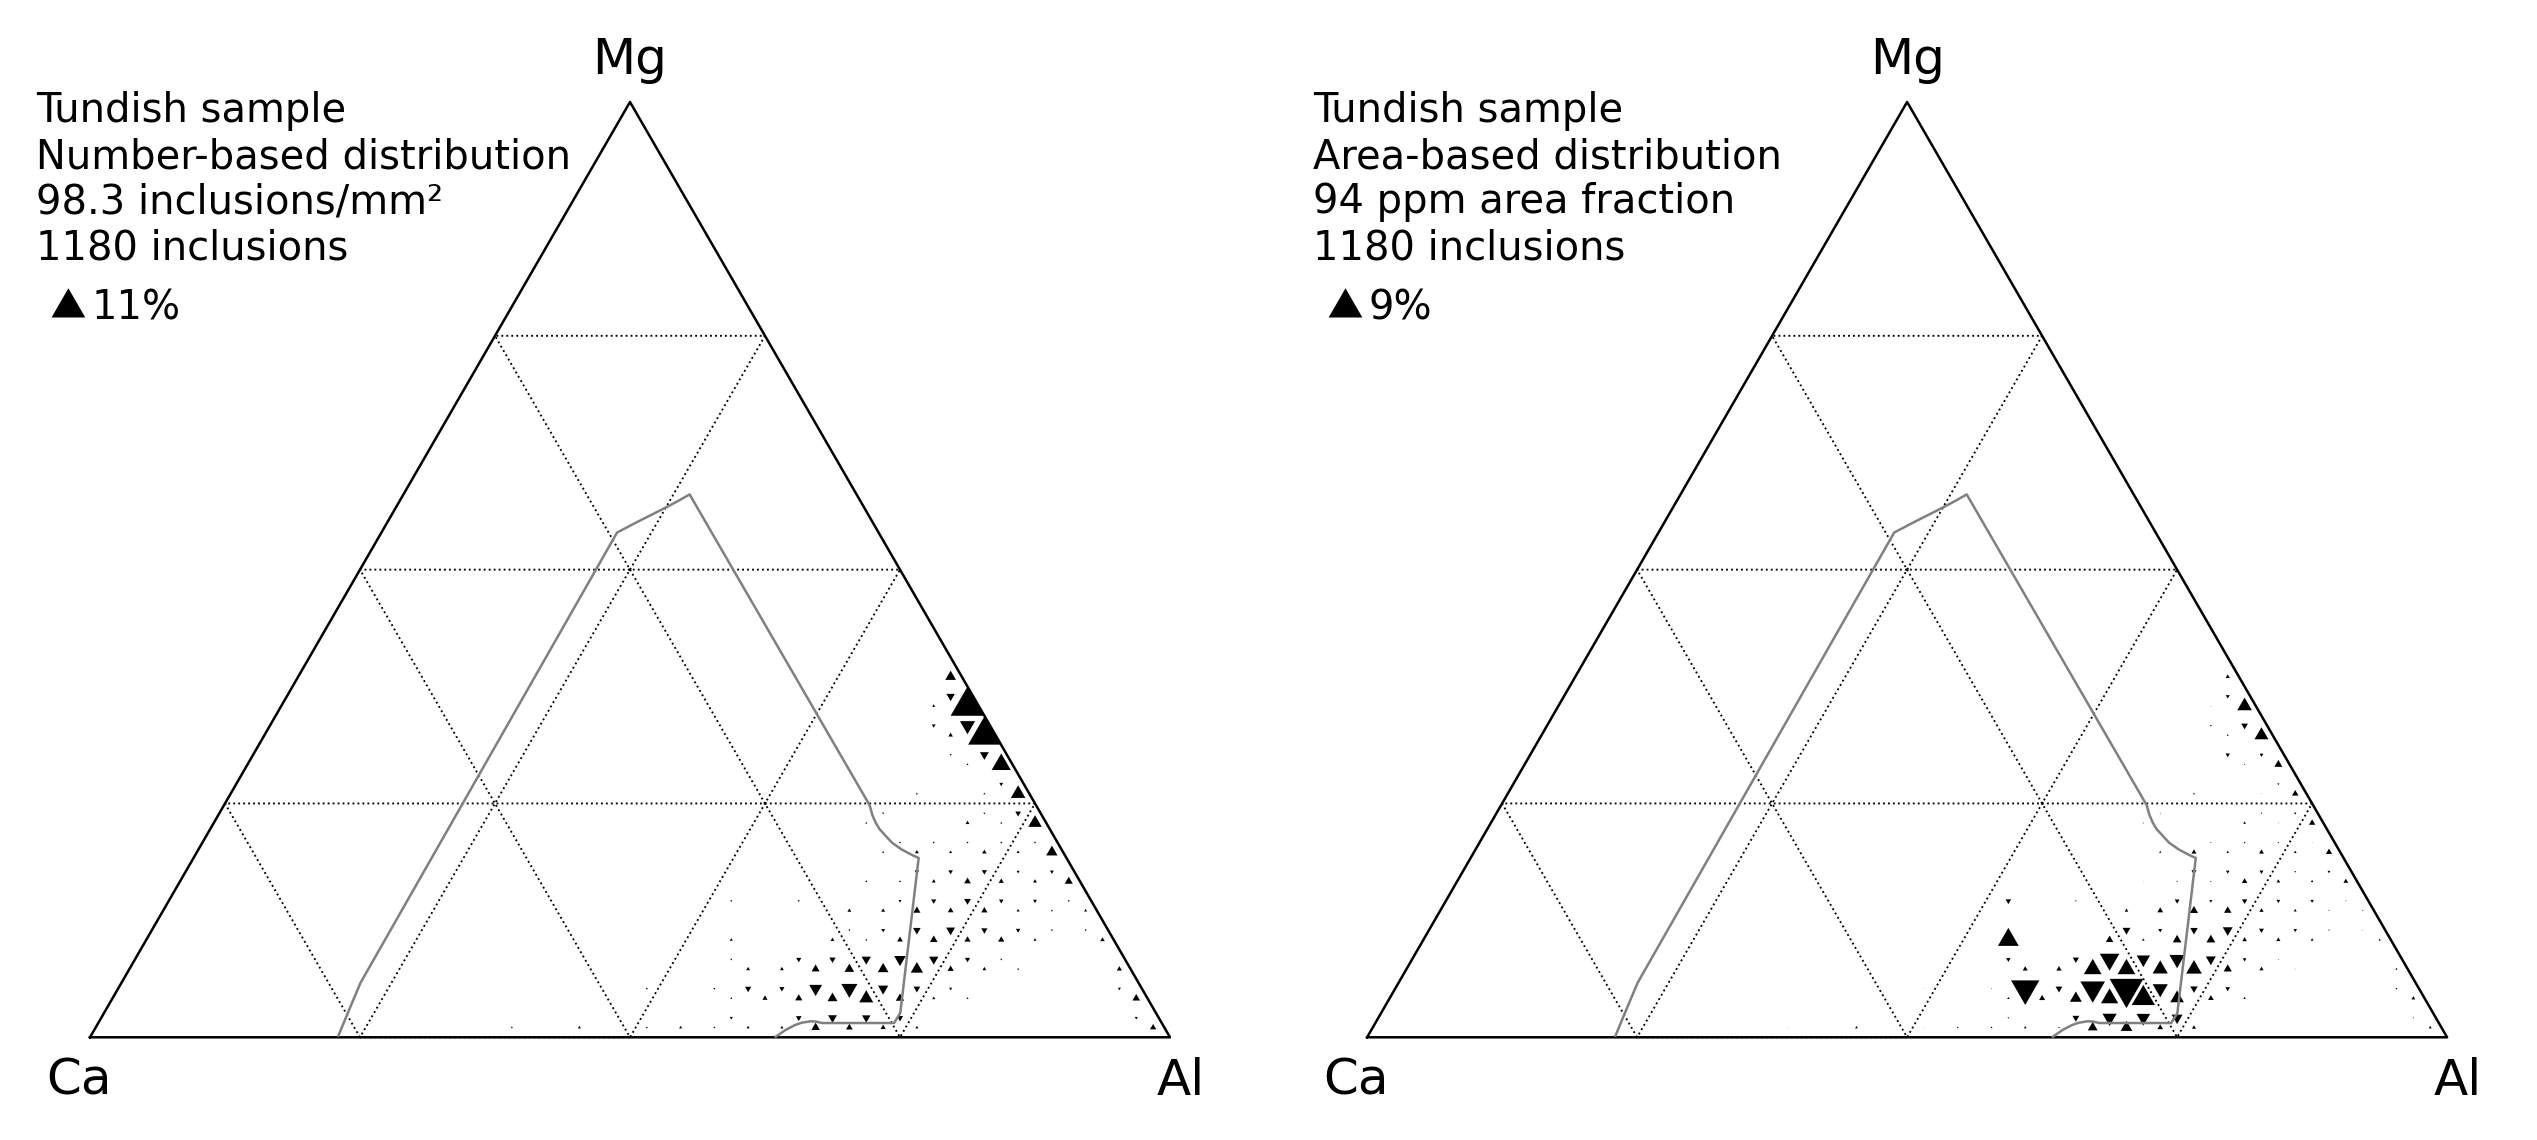

In [5]:
# Test that all compositions are non-negative and convert to x-y coordinates
x_data = [(b_data[i] + a_data[i] / 2.0) if ((a_data[i] >= 0) and (b_data[i] >= 0) and (c_data[i] >= 0)) else None for i
          in range(len(a_data))]
y_data = [a_data[i] if ((a_data[i] >= 0) and (b_data[i] >= 0) and (c_data[i] >= 0)) else None for i in
          range(len(a_data))]

asp_ratio = 1
get_border = tpf.fifty_border(boundary)

# now count the inclusions and calculate linear dimensions of the symbols
counts = tpf.count_inclusions(divisions, x_data, y_data,
                          area_data, area)  # item 0 in counts is number distribution, item 1 area distribution

count_triangles = tpf.make_triangles(divisions, counts[6])  # convert symbol sizes to polygons: number count
area_triangles = tpf.make_triangles(divisions, counts[7])  # convert symbol sizes to polygons: areas

frame = np.array([[0, 0], [1, 0], [0.5, 1], [0, 0]], dtype=float)  # coordinates of ternary frame
grid_coord = np.array([[0.25, 0], [0.125, 0.25], [0.875, 0.25], [0.75, 0], [0.375, 0.75], [0.625, 0.75],
                        [0.25, 0], [0.5, 0], [0.25, 0.5], [0.75, 0.5], [0.5, 0]])


line_width = 0.5
width = 6
width = width * 1.1 / 0.8
height = width * (3.0 ** 0.5) / 4 * asp_ratio  # height is 0.866 times width, for equilateral triangle


fig = plt.figure(figsize=(width, height), dpi=360,
                    facecolor='white')  # set image area to achieve correct aspect ratio
# set up axes for left hand plot
axes = fig.add_axes([0.05, 0.05, 0.4, 0.8])  # left, bottom, width, height (range 0 to 1)
#axes.plot(lines.iloc[:, 0], lines.iloc[:, 1], color='grey', linewidth=0.3)
axes.set_ylim([-0.05, 1.05])
axes.set_xlim([-0.05, 1.05])
axes.axis('off')
axes.plot(frame[:, 0], frame[:, 1], color='black', linewidth=line_width)  # draw frame of ternary plot
axes.plot(grid_coord[:, 0], grid_coord[:, 1], color='black', linewidth=line_width * 0.75,
            linestyle=':')  # draw grid of ternary plot
axes.text(0.5, 1.02, A, ha='center', va='bottom')  # Label the corners
axes.text(1.01, -0.02, B, ha='center', va='top')
axes.text(-0.01, -0.02, C, ha='center', va='top')
ID_label = sample_id + '\nNumber-based distribution'
axes.text(-0.05, 0.92, ID_label, ha='left', va='bottom', fontsize=8)  # Label plot with sample ID

# set up axes for right hand plot
axes2 = fig.add_axes([0.48, 0.05, 0.4, 0.8])  # left, bottom, width, height (range 0 to 1)
axes2.set_ylim([-0.05, 1.05])
axes2.set_xlim([-0.05, 1.05])
axes2.axis('off')
axes2.plot(frame[:, 0], frame[:, 1], color='black', linewidth=line_width)  # draw frame of ternary plot
axes2.plot(grid_coord[:, 0], grid_coord[:, 1], color='black', linewidth=line_width * 0.75,
            linestyle=':')  # draw grid of ternary plot
axes2.text(0.5, 1.02, A, ha='center', va='bottom')  # Label the corners
axes2.text(1.01, -0.02, B, ha='center', va='top')
axes2.text(-0.01, -0.02, C, ha='center', va='top')
ID_label = sample_id + '\nArea-based distribution'
axes2.text(-0.05, 0.92, ID_label, ha='left', va='bottom', fontsize=8)  # Label plot with sample ID


axes.fill(count_triangles[:, 0], count_triangles[:, 1], facecolor='k',
          edgecolor='none')  # draw polygons of proportional symbols - number count

axes2.fill(area_triangles[:, 0], area_triangles[:, 1], facecolor='k',
           edgecolor='none')  # draw polygons of proportional symbols - area count

axes.plot(get_border[:, 0], get_border[:, 1], color='grey', linewidth=0.5)  # draw 50% liquid boundary

axes2.plot(get_border[:, 0], get_border[:, 1], color='grey', linewidth=0.5)  # draw 50% liquid boundary

axes.text(-0.05, 0.915, str(round(counts[2] / area, 1)) + ' inclusions/mm' + chr(178) + '\n' + str(
    int(counts[2])) + ' inclusions',
          ha='left', va='top',
          fontsize=8)  # Show inclusion number density (i.e. inclusions/scanned area) and total number of inclusions

axes2.text(-0.05, 0.915, str(int(counts[5])) + ' ppm area fraction' + '\n' + str(int(counts[2])) + ' inclusions',
           ha='left', va='top', fontsize=8)  # Show inclusion area fraction and total number of inclusions

axes.text(-0.03 + 1.0 / divisions, 0.78, str(int(counts[1])) + '%', ha='left', va='center',
          fontsize=8)  # Number percentage of largest triangle

axes2.text(-0.03 + 1.0 / divisions, 0.78, str(int(counts[4])) + '%', ha='left', va='center',
           fontsize=8)  # Area percentage of largest triangle

plt.show()

## Save the plot

Run the cell below if you want to save your plot as an image file with specified resolution, or you can right-click and save.

In [ ]:
fig.savefig(path + '/plot_output.png', dpi=360) # save the plot with specified resolution